| Campo                                           | Transformación                         |
|-------------------------------------------------|----------------------------------------|
| Marital status                                 | NaN                                    |
| Application mode                               | NaN                                    |
| Application order                              | NaN                                    |
| Course                                          | NaN                                    |
| Daytime/evening attendance                      | NaN                                    |
| Previous qualification                         | NaN                                    |
| Nacionality                                    | NaN                                    |
| Mother's qualification                         | NaN                                    |
| Father's qualification                         | NaN                                    |
| Mother's occupation                            | NaN                                    |
| Father's occupation                            | NaN                                    |
| Displaced                                      | NaN                                    |
| Educational special needs                       | NaN                                    |
| Debtor                                          | NaN                                    |
| Tuition fees up to date                         | NaN                                    |
| Gender                                          | NaN                                    |
| Scholarship holder                             | NaN                                    |
| Age at enrollment                              | NaN                                    |
| International                                  | NaN                                    |
| Curricular units 1st sem (credited)            | NaN                                    |
| Curricular units 1st sem (enrolled)            | NaN                                    |
| Curricular units 1st sem (evaluations)         | NaN                                    |
| Curricular units 1st sem (approved)            | NaN                                    |
| Curricular units 1st sem (grade)               | NaN                                    |
| Curricular units 1st sem (without evaluations) | NaN                                    |
| Curricular units 2nd sem (credited)            | NaN                                    |
| Curricular units 2nd sem (enrolled)            | NaN                                    |
| Curricular units 2nd sem (evaluations)         | NaN                                    |
| Curricular units 2nd sem (approved)            | NaN                                    |
| Curricular units 2nd sem (grade)               | NaN                                    |
| Curricular units 2nd sem (without evaluations) | NaN                                    |
| Unemployment rate                              | NaN                                    |
| Inflation rate                                 | NaN                                    |
| GDP                                             | NaN                                    |
| Target                                          | NaN                                    |


In [1]:
# Librerias
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

## 1. Importamos Datos

In [2]:
df = pd.read_csv(r'..\..\Data\school_dropout.csv', sep=';')

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666.666.666.666.600,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate


In [4]:
# Lista de columnas a convertir a tipo numérico
numeric_columns = ['Unemployment rate', 'Inflation rate', 'GDP']

# Convertir las columnas a numérico
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convertir el resto de las columnas a tipo str
df[df.columns.difference(numeric_columns)] = df[df.columns.difference(numeric_columns)].astype(str)


## 2. Tratamiento de datos

### 2.1. Arreglamos los campos Curricular units 1st sem (grade)	y Curricular units 2nd sem (grade)	

In [6]:
import pandas as pd

def expand_curricular_units(column_name):
    """
    Expande los códigos de unidades curriculares en columnas separadas en el DataFrame global.

    Args:
    column_name (str): El nombre de la columna que contiene los códigos de unidades curriculares.

    Returns:
    pd.DataFrame: El DataFrame global con nuevas columnas para cada código de unidad curricular.
    """
    global df  # Aseguramos que usamos el DataFrame global

    # Inicializamos el conjunto vacío
    all_codes = set()

    # Iteramos sobre cada valor de la columna y actualizamos el conjunto
    df[column_name].apply(lambda x: all_codes.update(x.split('.')))

    # Creamos un diccionario para almacenar las nuevas columnas
    new_columns = {}

    # Para cada código en all_codes, creamos una nueva columna
    for code in all_codes:
        # El nombre de la nueva columna será column_name + '_' + code
        column_name_code = f'{column_name}_{code}'
        # Agregamos la nueva columna al diccionario con True/False
        new_columns[column_name_code] = df[column_name].apply(lambda x: code in x.split('.'))

    # Convertimos el diccionario a DataFrame y concatenamos con el original
    new_columns_df = pd.DataFrame(new_columns)

    # Concatenamos con el DataFrame original sin crear columnas duplicadas
    df = pd.concat([df, new_columns_df], axis=1)

    return df

df = expand_curricular_units('Curricular units 1st sem (grade)')
df[['Curricular units 1st sem (grade)', 'Curricular units 1st sem (grade)_0', 'Curricular units 1st sem (grade)_13', 'Curricular units 1st sem (grade)_428']].head()


,Curricular units 1st sem (grade),Curricular units 1st sem (grade)_0,Curricular units 1st sem (grade)_13,Curricular units 1st sem (grade)_428
0,0.0,True,False,False
1,14.0,True,False,False
2,0.0,True,False,False
3,13.428.571.428.571.400,False,True,True
4,12.333.333.333.333.300,False,False,False


In [7]:
df = expand_curricular_units('Curricular units 2nd sem (grade)')
df[['Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (grade)_0', 'Curricular units 2nd sem (grade)_13', 'Curricular units 2nd sem (grade)_666']].head()


,Curricular units 2nd sem (grade),Curricular units 2nd sem (grade)_0,Curricular units 2nd sem (grade)_13,Curricular units 2nd sem (grade)_666
0,0.0,True,False,False
1,13.666.666.666.666.600,False,True,True
2,0.0,True,False,False
3,12.4,False,False,False
4,13.0,True,True,False


### 2.2. Estudiamos qué tipo de transformación es mejor para los campos numéricos: Unemployment rate, Inflation rate, GDP.

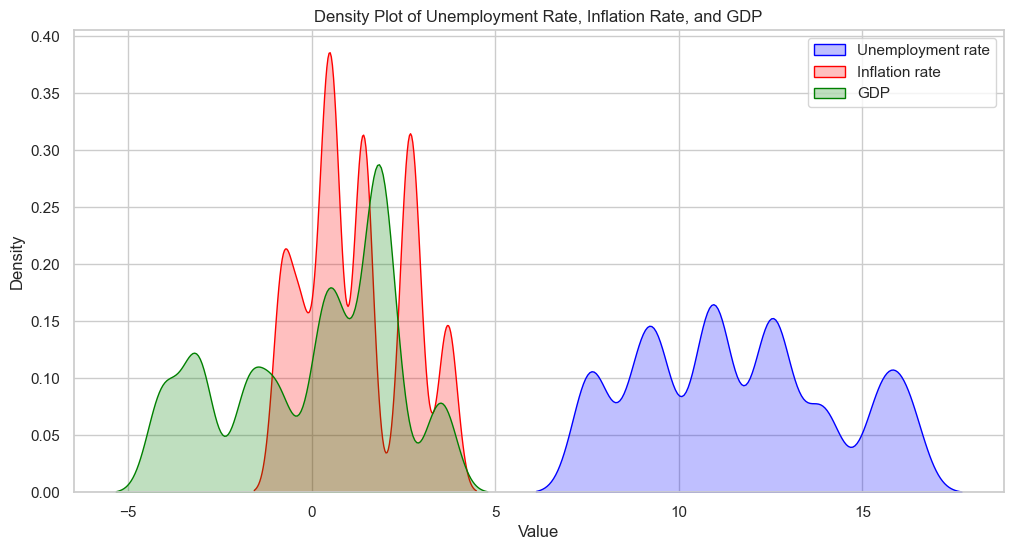

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame 'df' definido
# Crear el gráfico de densidad para las tres columnas

# Configura el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Unemployment rate', fill=True, label='Unemployment rate', color='blue')
sns.kdeplot(data=df, x='Inflation rate', fill=True, label='Inflation rate', color='red')
sns.kdeplot(data=df, x='GDP', fill=True, label='GDP', color='green')

# Añadir títulos y leyendas
plt.title('Density Plot of Unemployment Rate, Inflation Rate, and GDP')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Mostrar el gráfico
plt.show()


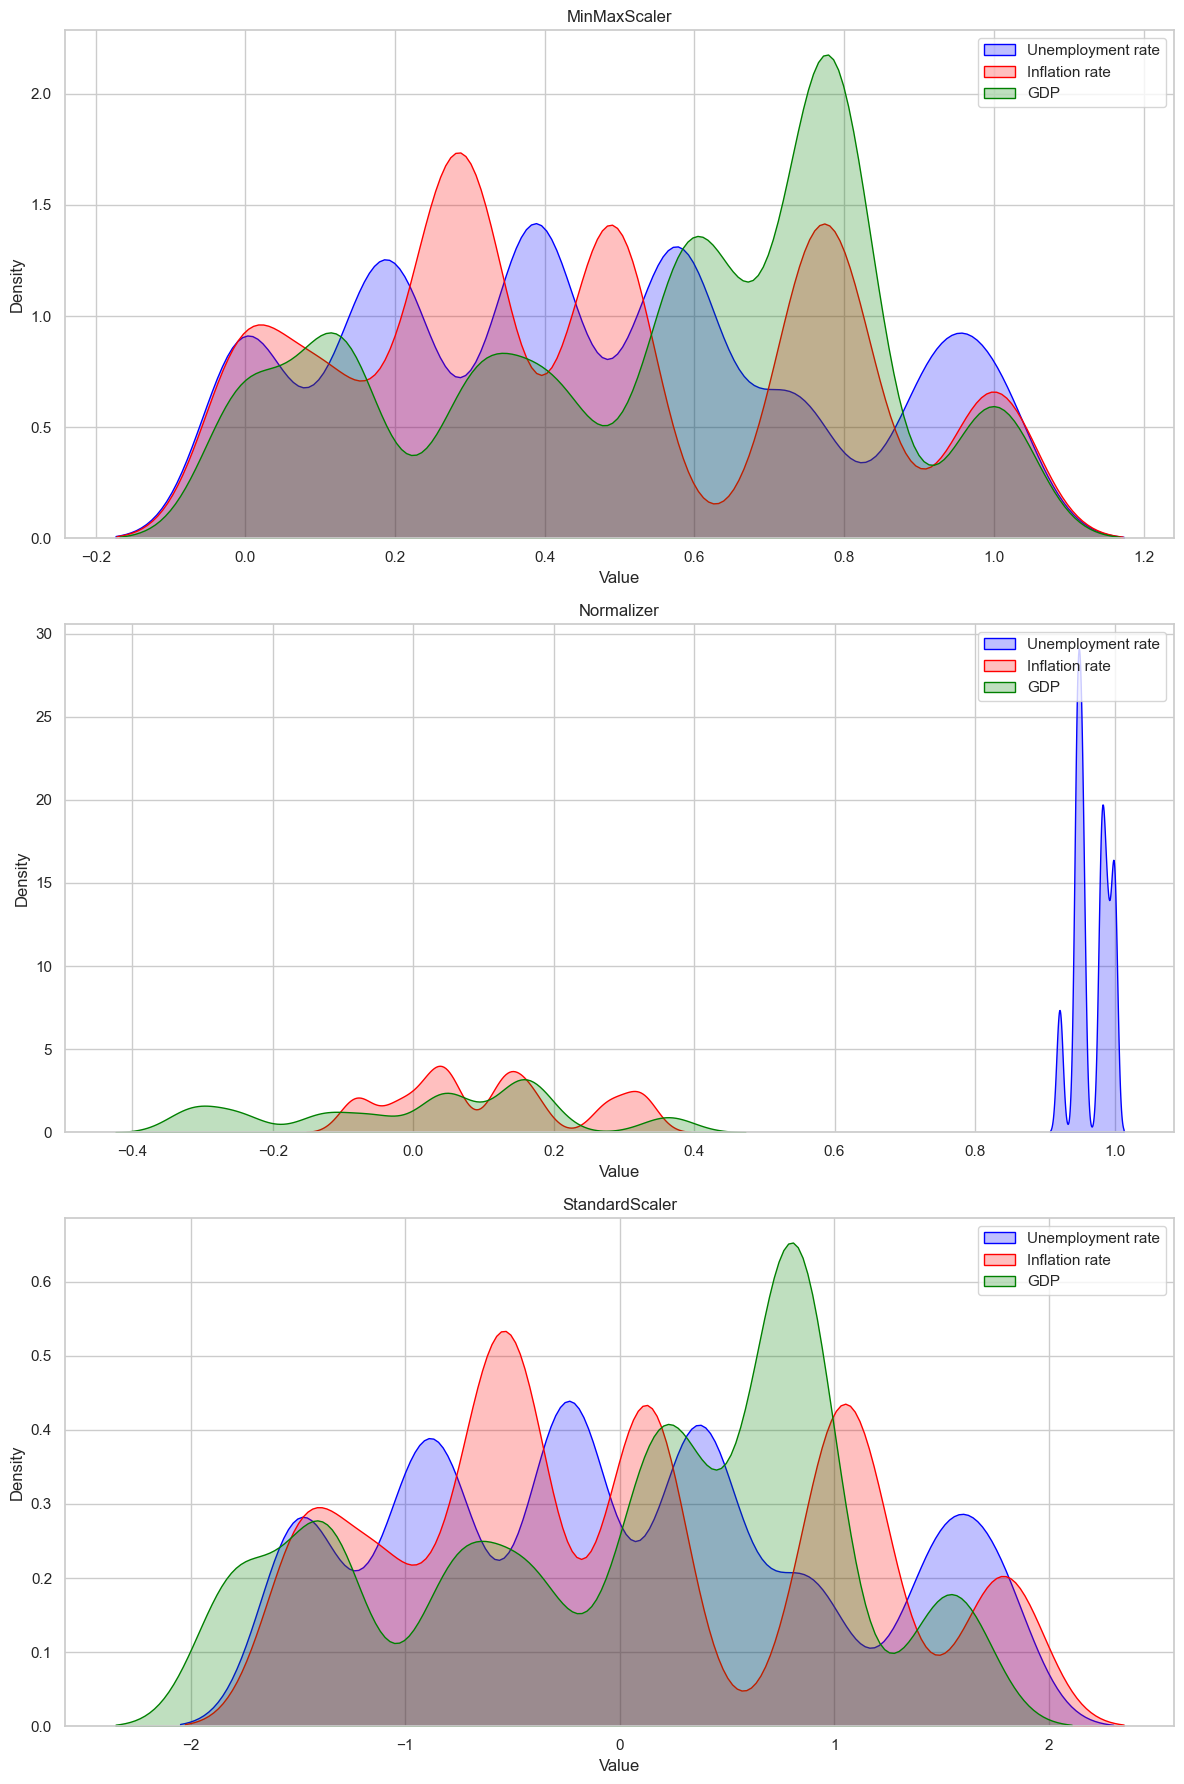

In [9]:
# Crear los escaladores
minmax_scaler = MinMaxScaler()
normalizer = Normalizer()
standard_scaler = StandardScaler()

# Aplicar las transformaciones solo a las columnas continuas
df_cont_columns = df[['Unemployment rate', 'Inflation rate', 'GDP']]
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_cont_columns), columns=df_cont_columns.columns)
df_normalized = pd.DataFrame(normalizer.fit_transform(df_cont_columns), columns=df_cont_columns.columns)
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df_cont_columns), columns=df_cont_columns.columns)

# Crear los subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico de MinMaxScaler
sns.kdeplot(data=df_minmax, x='Unemployment rate', fill=True, label='Unemployment rate', color='blue', ax=axs[0])
sns.kdeplot(data=df_minmax, x='Inflation rate', fill=True, label='Inflation rate', color='red', ax=axs[0])
sns.kdeplot(data=df_minmax, x='GDP', fill=True, label='GDP', color='green', ax=axs[0])
axs[0].set_title('MinMaxScaler')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Density')
axs[0].legend()

# Gráfico de Normalizer
sns.kdeplot(data=df_normalized, x='Unemployment rate', fill=True, label='Unemployment rate', color='blue', ax=axs[1])
sns.kdeplot(data=df_normalized, x='Inflation rate', fill=True, label='Inflation rate', color='red', ax=axs[1])
sns.kdeplot(data=df_normalized, x='GDP', fill=True, label='GDP', color='green', ax=axs[1])
axs[1].set_title('Normalizer')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Density')
axs[1].legend()

# Gráfico de StandardScaler
sns.kdeplot(data=df_standardized, x='Unemployment rate', fill=True, label='Unemployment rate', color='blue', ax=axs[2])
sns.kdeplot(data=df_standardized, x='Inflation rate', fill=True, label='Inflation rate', color='red', ax=axs[2])
sns.kdeplot(data=df_standardized, x='GDP', fill=True, label='GDP', color='green', ax=axs[2])
axs[2].set_title('StandardScaler')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Density')
axs[2].legend()

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### 2.3. Correlaciones en las variables continuas.

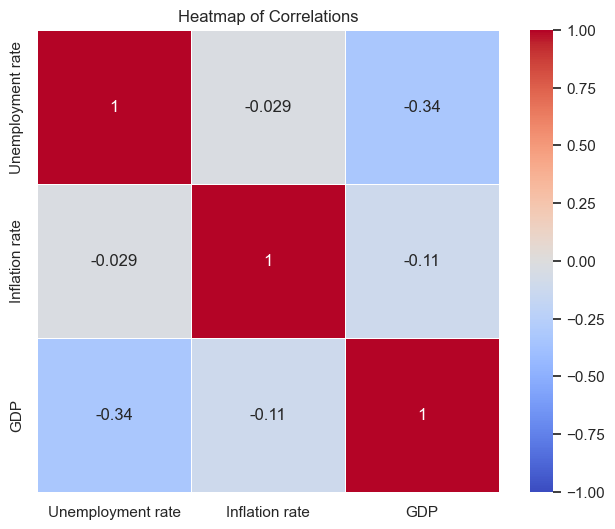

In [10]:
# Calcular la matriz de correlación
correlation_matrix = df[['Unemployment rate', 'Inflation rate', 'GDP']].corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)

# Añadir títulos y ajustar el diseño
plt.title('Heatmap of Correlations')
plt.show()


### 2.4. Correlación variables categóricas.

Calculando Cramér's V - Fila: 100%|██████████| 956/956 [29:58<00:00,  1.88s/it] 


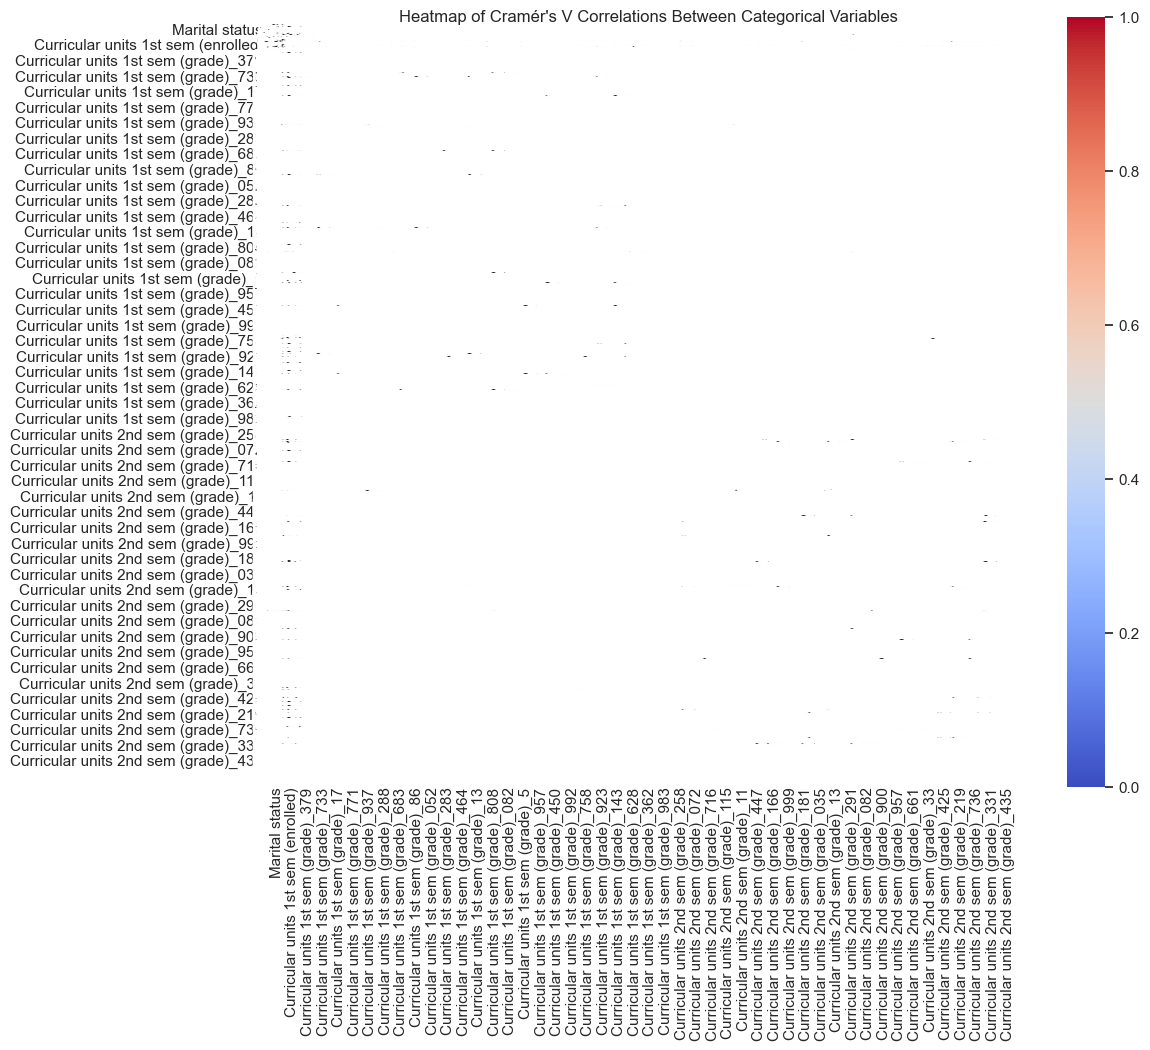

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from tqdm import tqdm

# Función para calcular el coeficiente de Cramér V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix, lambda_="log-likelihood")[0]
    n = confusion_matrix.sum().sum()  # Asegurarse de obtener un escalar
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# Lista de columnas numéricas
numeric_columns = ['Unemployment rate', 'Inflation rate', 'GDP']

# Filtrar las columnas categóricas
categorical_columns = [col for col in df.columns if col not in numeric_columns]

# Crear una matriz vacía para almacenar los valores de Cramér V
num_categorical = len(categorical_columns)
cramers_v_matrix = np.full((num_categorical, num_categorical), np.nan)

# Añadir una barra de progreso para ambos bucles
for i, col1 in tqdm(enumerate(categorical_columns), total=num_categorical, desc='Calculando Cramér\'s V - Fila'):
    for j in tqdm(range(i + 1, num_categorical), desc='Columna', leave=False):
        col2 = categorical_columns[j]
        confusion_matrix = pd.crosstab(df[col1], df[col2])
        if not confusion_matrix.empty:  # Verificar si la tabla de contingencia no está vacía
            cramers_v_value = cramers_v(confusion_matrix)
            cramers_v_matrix[i, j] = cramers_v_value
            cramers_v_matrix[j, i] = cramers_v_value  # La matriz es simétrica

# Convertir la matriz Numpy a DataFrame
cramers_v_matrix_df = pd.DataFrame(cramers_v_matrix, index=categorical_columns, columns=categorical_columns)

In [16]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 15))

# Crear el heatmap
sns.heatmap(cramers_v_matrix_df, annot=True, cmap='coolwarm', vmin=0, vmax=1, square=True, linewidths=.5)

# Añadir títulos y ajustar el diseño
plt.title("Heatmap of Cramér's V Correlations Between Categorical Variables")
plt.show()